In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import shapiro

print('20127250 \nHo Thi Thanh Ngan')


20127250 
Ho Thi Thanh Ngan


In [3]:
df_DT1 = pd.read_csv("https://raw.githubusercontent.com/Nganho22/20127250_BT2/master/athlete_events%20filter.csv")
df_DT1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
3,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
4,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN


In [4]:
df_DT2 = pd.read_csv("https://raw.githubusercontent.com/Nganho22/20127250_BT2/master/noc_regions.csv")
df_DT2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
#Doc file du lieu vao dataframe
DT1 = pd.DataFrame(df_DT1)
DT2 = pd.DataFrame(df_DT2)

In [6]:
#Merge file
merged_DT = pd.merge(DT1, DT2, on='NOC', how='left' )
print(merged_DT)



           ID                Name Sex   Age  Height  Weight           Team  \
0           1           A Dijiang   M  24.0   180.0    80.0          China   
1           2            A Lamusi   M  23.0   170.0    60.0          China   
2           6     Per Knut Aaland   M  31.0   188.0    75.0  United States   
3           6     Per Knut Aaland   M  31.0   188.0    75.0  United States   
4           6     Per Knut Aaland   M  31.0   188.0    75.0  United States   
...       ...                 ...  ..   ...     ...     ...            ...   
79737  135569          Andrzej ya   M  29.0   179.0    89.0       Poland-1   
79738  135570            Piotr ya   M  27.0   176.0    59.0         Poland   
79739  135570            Piotr ya   M  27.0   176.0    59.0         Poland   
79740  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0         Poland   
79741  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0         Poland   

       NOC        Games  Year  Season            City          

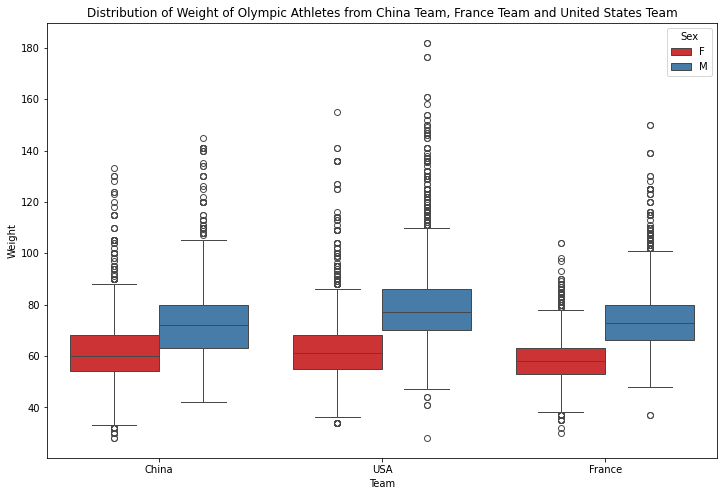

In [30]:
select_team_by_region = ["China","France", "USA"]
Select_NOC = DT2[DT2["region"].isin(select_team_by_region)]
weight_by_team = merged_DT[merged_DT["NOC"].isin(Select_NOC['NOC'])]
weight_by_team = weight_by_team.sort_values(by='Weight', ascending=True)  # ascending=True nếu muốn sắp xếp tăng dần



# Biểu đồ boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='Weight', data=weight_by_team, hue='Sex', palette='Set1')
plt.title('Distribution of Weight of Olympic Athletes from China Team, France Team and United States Team')
plt.xlabel('Team')
plt.ylabel('Weight')
plt.legend(title='Sex')
plt.show()





In [10]:
Q1 = weight_by_team['Weight'].quantile(0.25)
Q3 = weight_by_team['Weight'].quantile(0.75)
IQR = Q3-Q1
outliers = weight_by_team[(weight_by_team['Weight'] < Q1 - 1.5*IQR) | (weight_by_team['Weight'] > Q3 + 1.5 *IQR)]


print("Outliers:")
print(outliers)
Tong_missing_values = weight_by_team['Weight'].isnull().sum()
print("Tong gia tri bi missing ve Weight cua 3 doi China, United States & France la:")
print(Tong_missing_values)


Outliers:
           ID                            Name Sex   Age  Height  Weight  \
73635  128605              Wang Xin (Ruoxue-)   F  15.0   137.0    28.0   
73634  128605              Wang Xin (Ruoxue-)   F  15.0   137.0    28.0   
78519  134370  Albert Ferdinand "Al" Zerhusen   M  24.0   183.0    28.0   
43176   71914                           Lu Li   F  15.0   136.0    30.0   
43181   71914                           Lu Li   F  15.0   136.0    30.0   
...       ...                             ...  ..   ...     ...     ...   
27188   45319             Shane Justin Hamman   M  32.0   173.0   161.0   
28899   47755     Marcus Jerrold "Mark" Henry   M  21.0   190.0   176.5   
28900   47755     Marcus Jerrold "Mark" Henry   M  25.0   190.0   176.5   
68750  118869   Christopher J. "Chris" Taylor   M  22.0   196.0   182.0   
68749  118869   Christopher J. "Chris" Taylor   M  22.0   196.0   182.0   

                Team  NOC        Games  Year  Season       City  \
73635          China  

In [49]:
Weight_team = weight_by_team[['region','Weight']]
L = ["China"]
China = Weight_team[Weight_team['region'].isin(L)]

L = ["USA"]
USA = Weight_team[Weight_team['region'].isin(L)]

L = ["France"]
France = Weight_team[Weight_team['region'].isin(L)]


In [56]:
a = China['Weight'].mean().round(2)
China.loc[China['Weight'].isnull(), 'Weight'] = a

a = USA['Weight'].mean().round(2)
USA.loc[USA['Weight'].isnull(), 'Weight'] = a

a = France['Weight'].mean().round(2)
France.loc[France['Weight'].isnull(), 'Weight'] = a




In [57]:
alpha = 0.05
#kiem tra phan phoi chuan


statistic_china, p_china = shapiro(China['Weight'])
statistic_usa, p_usa = shapiro(USA['Weight'])

statistic_france, p_france = shapiro(France['Weight'])

print(f"Statistic_Online: {statistic_china}")
print(f"P-value_online: {p_china}")



if p_china < alpha:
    print("Du lieu can nang cua China khong tuan theo phan phoi chuan.")
else:
    print("Du lieu can nang cua China co the tuan theo phan phoi chuan.")

print(f"Statistic_Online: {statistic_usa}")
print(f"P-value_online: {p_usa}")



if p_usa < alpha:
    print("Du lieu can nang cua China khong tuan theo phan phoi chuan.")
else:
    print("Du lieu can nang cua China co the tuan theo phan phoi chuan.")

print(f"Statistic_Online: {statistic_france}")
print(f"P-value_online: {p_france}")



if p_france < alpha:
    print("Du lieu can nang cua China khong tuan theo phan phoi chuan.")
else:
    print("Du lieu can nang cua China co the tuan theo phan phoi chuan.")



Statistic_Online: 0.9569418430328369
P-value_online: 2.127573101374487e-38
Du lieu can nang cua China khong tuan theo phan phoi chuan.
Statistic_Online: 0.9372098445892334
P-value_online: 0.0
Du lieu can nang cua China khong tuan theo phan phoi chuan.
Statistic_Online: 0.8998408317565918
P-value_online: 0.0
Du lieu can nang cua China khong tuan theo phan phoi chuan.


In [58]:
statistic, p_value = f_oneway(China['Weight'], USA['Weight'], France['Weight'])
alpha = 0.05
print(f'Statistic: {statistic}')
print(f'P-value: {p_value}')

# Kiểm tra giả thuyết
if p_value < alpha:
    print("Có sự khác biệt đáng kể về cân nặng giữa các đội.")
else:
    print("Không có sự khác biệt đáng kể về cân nặng giữa các đội.")

Statistic: 652.2748444895047
P-value: 3.5068681143727225e-279
Có sự khác biệt đáng kể về cân nặng giữa các đội.
